# Effect of Stadium Dimensions on Baseball Outcomes

#### Daniel Alleva
May 13, 2018

### Outline:

One aspect of baseball that makes it unique among American professional sports is that the fields on which it is played are not completely standardized.  Every Major League Baseball Team sets the distances and shape of its outfield walls, influencing the outcomes of identically hit baseballs in different stadiums.  For example, a batted ball that results in a homerun in Boston might result in an out in St. Louis.  This leads to different results occurring in games played at different stadiums, independent of player or team talent.

This project analyzes the relationship between team statistics and the shape and qualities of their stadiums.  This project takes the total statistics accumulated by each team from the years 1998-2018 and examines the relationship between these statistics and the dimensions of the team's home stadium.  Since each team plays most of its games in its home stadium, variations in field dimensions  influenced the results seen by each team over the 20 year period.  This project also anayzes the relationship between altitude of the stadiums and team stats, given that games played at higher altitude will see batted balls travel further, since the air is thinner at higher altitudes.  Finally, the project also examines what happened to the Yankees and Mets before and after they each began to play in a newly built stadium.

The player data for this project was pulled from Sean Lahman's Database, and the data for each of the Stadiums was pulled from Seamheads.com.  


#### Importing Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns

## Run Production Statistical Trends

First I read in a Master List of all the players included in the dataset, to give TeamID and Player Names.

In [2]:
url="https://raw.githubusercontent.com/dannyalleva"
mas="/my_first_repository/master/Master.csv"
Master=pd.read_csv(url+mas)
Master.drop(["birthYear","birthMonth","birthDay","birthCountry",
             "birthState","birthCity","deathYear","deathMonth",
           "deathDay","deathCountry","deathState","deathCity",
             "nameGiven","retroID","bbrefID"],axis=1,inplace=True)  ##unncessary columns dropped

I next read in the Batting Stats for all players included in Sean Lahman's Database, select the stats for the years between 1998 and 2017, and merged it with the Master list, to connect player and team names to the statistics.

In [3]:
bat="/my_first_repository/master/Batting.csv"
Batting_Stats=pd.read_csv(url+bat)
Batting_Stats.set_index("yearID",inplace=True)  ##sets index to years so I can pull specific years out easily
Years=list(range(1998,2018))  ## creates a list of every year from 1998 to 2017
Batting_Stats=Batting_Stats.loc[Years]  ##selects just the years from 1998 to 2017 from DataFrame

In [4]:
Batting_Stats.drop(["stint","lgID"],axis=1,inplace=True)
Batting_Stats.reset_index(inplace=True) ## resets index so yearID becomes a normal column
Batting_Data=pd.merge(Batting_Stats,Master,how="inner",
                      on="playerID",indicator=True)  ##merges Batting Stats with the Master List to get player info
                                                        ## attached to stats

3 teams changed teamID over the time period considered. Montreal became Washington, Florida became 
Miami and Anaheim became Los Angeles I wanted the teams to be considered as one continuous entity for the 
purpose of this project so I used the replace function to make all players in these franchises appear under the same teamID

In [5]:
Batting_Data["teamID"].replace({"MON":"WAS","FLO":"MIA",
                                "ANA":"LAA"},
                               inplace=True)
Batting_Data.head()

,yearID,playerID,teamID,G,AB,R,H,2B,3B,HR,...,GIDP,nameFirst,nameLast,weight,height,bats,throws,debut,finalGame,_merge
0,1998,abbotje01,CHA,89,244,33,68,14,1,12,...,2.0,Jeff,Abbott,190.0,74.0,R,L,1997-06-10,2001-09-29,both
1,1999,abbotje01,CHA,17,57,5,9,0,0,2,...,4.0,Jeff,Abbott,190.0,74.0,R,L,1997-06-10,2001-09-29,both
2,2000,abbotje01,CHA,80,215,31,59,15,1,3,...,2.0,Jeff,Abbott,190.0,74.0,R,L,1997-06-10,2001-09-29,both
3,2001,abbotje01,MIA,28,42,5,11,3,0,0,...,1.0,Jeff,Abbott,190.0,74.0,R,L,1997-06-10,2001-09-29,both
4,1998,abbotji01,CHA,5,0,0,0,0,0,0,...,0.0,Jim,Abbott,200.0,75.0,L,L,1989-04-08,1999-07-21,both


Next, I read in a dataset that included the Win-Loss records for all Major League teams for each season between 1998 and 2017.

In [6]:
tms="/my_first_repository/master/Teams.csv"
wins=pd.read_csv(url+tms)
wins.drop(['Ghome','lgID','DivWin', 'WCWin', 'LgWin', 'WSWin', 'R', 'AB', 'H', '2B',
       '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP',
       'name', 'park', 'attendance', 'BPF', 'PPF', 'teamIDBR',
       'teamIDlahman45', 'teamIDretro'],axis=1,inplace=True)  
wins.set_index("yearID",inplace=True)
wins=wins.loc[Years]
wins.drop(["franchID","divID","Rank"],axis=1,inplace=True)
wins["w_pct"]=round((wins["W"]/wins["G"])*100,2) ## creates a column for win percentage, defined by wins/games*100
wins["teamID"].replace({"MON":"WAS","FLO":"MIA",
                                "ANA":"LAA"},
                               inplace=True) ## replace teams with changed ID's
wins.head()

,teamID,G,W,L,w_pct
yearID,,,,,
1998,LAA,162,85,77,52.47
1998,ARI,162,65,97,40.12
1998,ATL,162,106,56,65.43
1998,BAL,162,79,83,48.77
1998,BOS,162,92,70,56.79


Next, I used the groupby function to create DataFrames consisting of the acculumated stats for each team for Runs Batted In and Home Runs.

In [7]:
Team_Batting=Batting_Data.groupby("teamID")  ##groups batting Data by team
Team_RBI=Team_Batting["RBI"].describe() ##creates statistical summary for RBI grouped by team
Team_HR=Team_Batting["HR"].describe() ##same statistical summary for HR
Team_RBI["RBI_Sum"]=Team_Batting.RBI.sum()  ## adds sums to the statistical summaries 
Team_HR["HR_Sum"]=Team_Batting.HR.sum()

In [8]:
Team_RBI.head()

,count,mean,std,min,25%,50%,75%,max,RBI_Sum
teamID,,,,,,,,,
ARI,921.0,15.235613,25.450845,0.0,0.0,2.0,18.00,142.0,14032.0
ATL,898.0,15.677060,27.179332,0.0,0.0,1.0,19.75,132.0,14078.0
BAL,938.0,15.105544,27.009713,0.0,0.0,0.0,16.75,150.0,14169.0
BOS,979.0,16.204290,29.412223,0.0,0.0,0.0,18.00,148.0,15864.0
CHA,833.0,17.374550,29.354005,0.0,0.0,0.0,23.00,152.0,14473.0


In [9]:
Team_HR.head()

,count,mean,std,min,25%,50%,75%,max,HR_Sum
teamID,,,,,,,,,
ARI,921.0,3.688382,7.320873,0.0,0.0,0.0,4.0,57.0,3397
ATL,898.0,3.724944,7.824942,0.0,0.0,0.0,3.0,51.0,3345
BAL,938.0,3.955224,7.968596,0.0,0.0,0.0,4.0,53.0,3710
BOS,979.0,3.812053,7.970768,0.0,0.0,0.0,3.5,54.0,3732
CHA,833.0,4.600240,8.885887,0.0,0.0,0.0,5.0,49.0,3832


Next I apply the groupby function to the Team Win-Loss Records to get a dataframe that shows the sum of Team Wins across the time frame.  I then added the wins sum dataframe to the RBI and HR dataframes for each team.

In [10]:
Team_Wins=wins.groupby("teamID")  ## groups team records by TeamID
Total_Wins=Team_Wins.W.sum()  ## creates a series which gives the sum of win for each team over the 20 year period
Team_RBI=Team_RBI.join(Total_Wins,how="outer") ## adds the win sums to the statistical summary data frames for RBI and 
Team_HR=Team_HR.join(Total_Wins,how="outer")      ## HR

For the project, I chose to use Runs Batted In and Home Runs divided by the Total Number of Wins to compare teams to each other. I chose to do this in an attempt to isolate the effect playing in different home stadiums has on the statistical differences.  If I had not divided by wins, it might be the case that a given team with a consistently high-talent roster over the 20 year period would have a higher RBI or HR totals due mostly to the disparity in talent. Giving these statistics per win allows for a measure of how many RBI's or HR's a team accumulated for every win they got, which I felt was a more accurate measure of how conducive a given stadium was to RBI or HR production.  If a team scored a large number of runs for every win it got, it follows that that team also gave up a lot of runs.  Because of this, it is logical to assume that a team with a high number for a stat like RBI/Win plays in a stadium where a lot of runs are scored by both teams.

In [11]:
Team_RBI["RBI/Wins"]=Team_RBI["RBI_Sum"]/Team_RBI["W"]  ## x/Win column created by dividing the Sum of x for each team 
Team_HR["HR/Wins"]=Team_HR["HR_Sum"]/Team_HR["W"]       ## by the total number of wins that team has

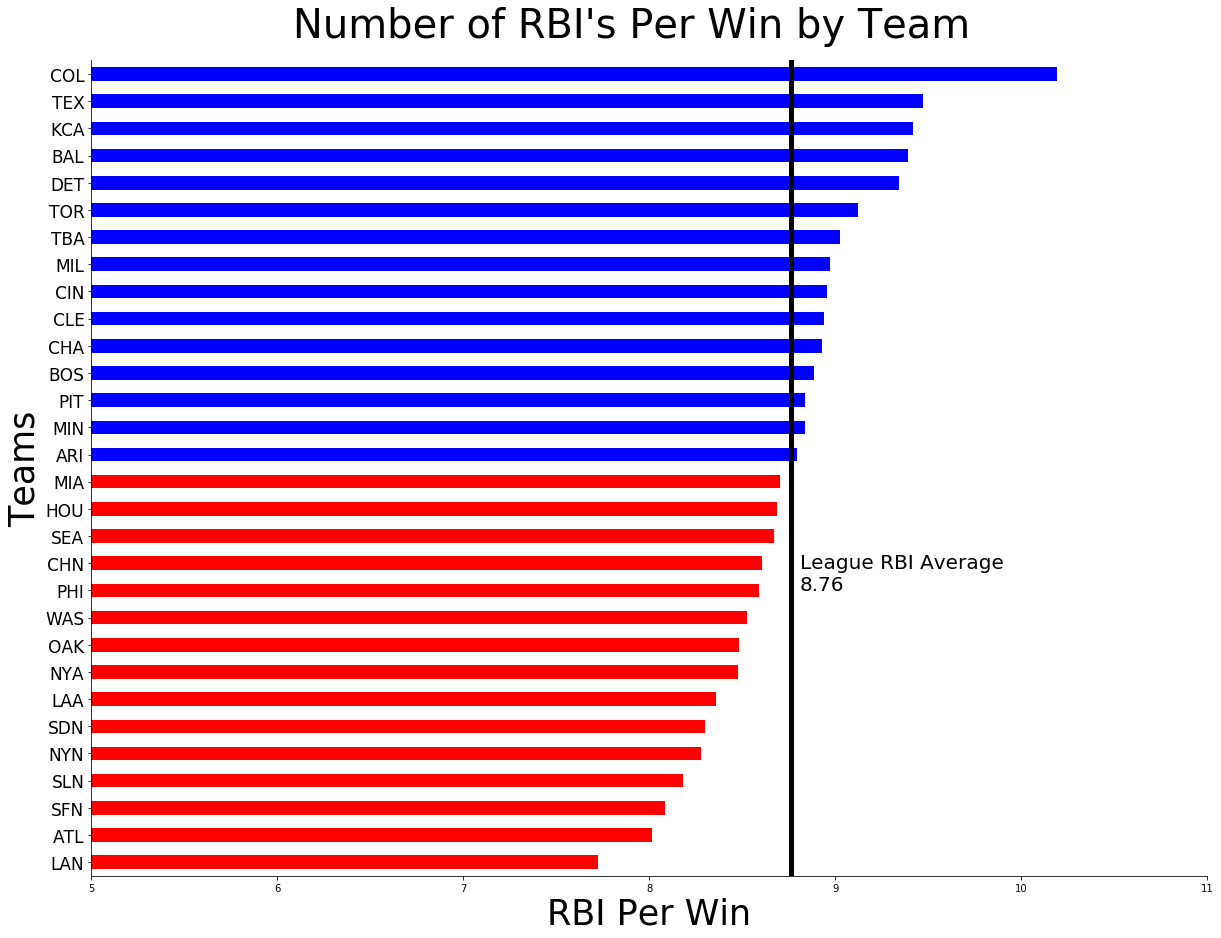

In [38]:
fig,ax=plt.subplots(figsize=(20,15))

colors_1=[]   ## creates an empty list of colors and then adds blue to that list for each entry that is above average
                ## and red for each entry below average.  For some reason this only works when the cell has been run
                ## twice. The first time it runs it does not assign the colors properly.  I was not able to figure out
                ## why it doesn't work initially but it works fine when it has been multiple times.
for item in Team_RBI["RBI/Wins"]:
    if item>Team_RBI["RBI/Wins"].mean():
        colors_1.append("b")
    else:
        colors_1.append("r")

Team_RBI=Team_RBI.sort_values("RBI/Wins")  ##sorts the values in Team_RBI by RBI/Win from high to low
Team_RBI.plot(ax=ax,y="RBI/Wins",kind="barh",color=colors_1)  ##plots a bar graph of RBI/Wins 

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_ylabel("Teams",fontsize=35)
ax.set_xlabel("RBI Per Win", fontsize=35)


avg_r=Team_RBI["RBI/Wins"].mean()
ax.axvline(x=avg_r,
          color="k", label="Average",linewidth=5)
message_r= "League RBI Average \n" + str(round(avg_r,2))  ##creates the line for the average

ax.text(avg_r+.05,10,message_r,fontsize=20)  ##denotes the average with text


ax.legend().set_visible(False)

ax.set_xlim(5,11)

ax.set_ymargin(0)

plt.yticks(fontsize=17)

fig.suptitle("Number of RBI's Per Win by Team",fontsize=40,y=.93)

plt.show()

This graph gives the RBI per Win for each Major League Team from 1998 to 2017.  It indicates the League Average of 8.76.  Teams that are above the average are printed in blue, while teams below the average are printed in red.  The Colorado Rockies, a team that plays at a significantly higher altitude than most teams, tallied by far the Most Runs Batted In per game won in the Major Leagues, while the Los Angeles Dodgers are the team that needed the fewest Runs Batted In per Game Won.  This suggests that Coors Field, Colorado's Stadium, is the most friendly stadium for RBI production, while Dodger Stadium is the least friendly.

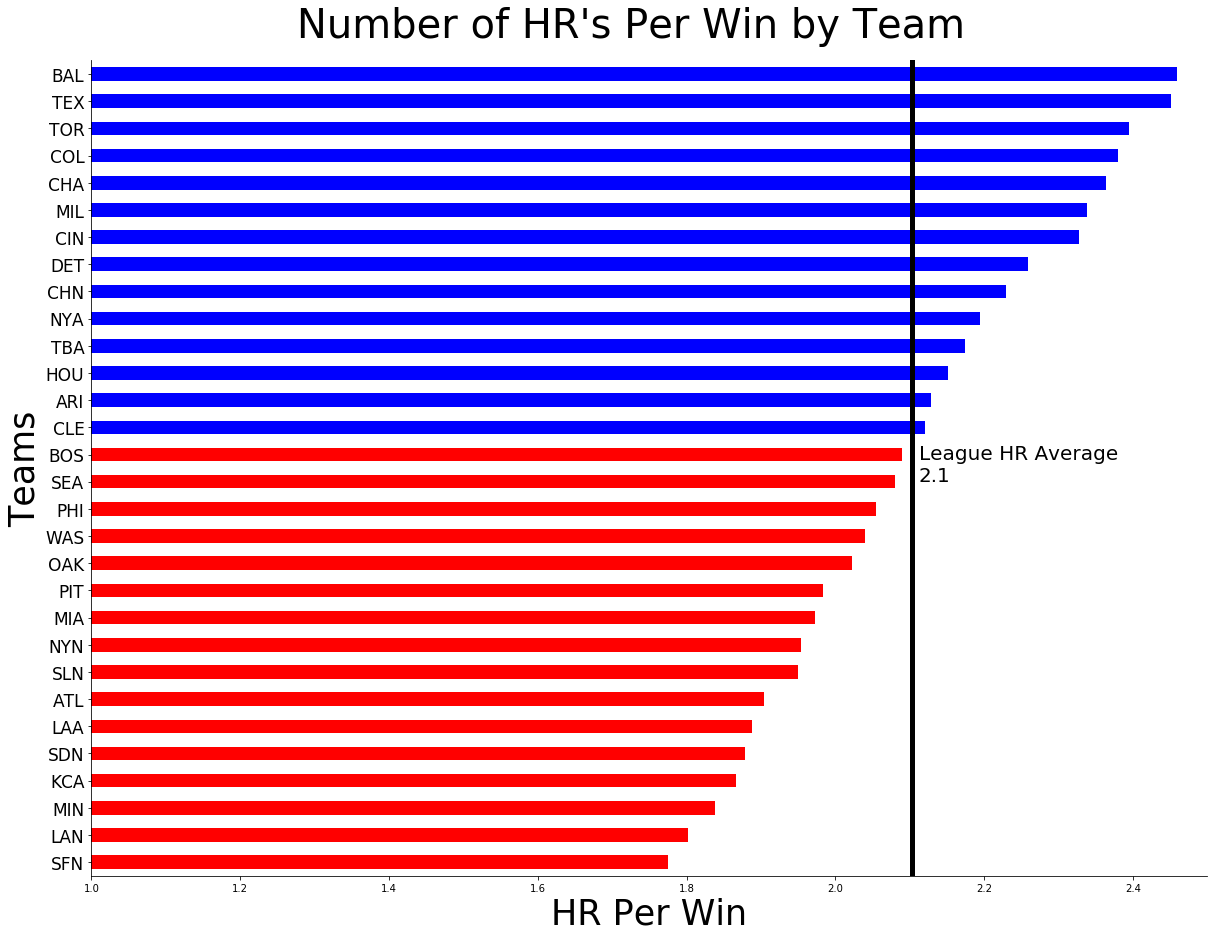

In [39]:
fig,ax=plt.subplots(figsize=(20,15))

colors_2=[]
for item in Team_HR["HR/Wins"]:
    if item>Team_HR["HR/Wins"].mean():
        colors_2.append("b")
    else:
        colors_2.append("r")

Team_HR=Team_HR.sort_values("HR/Wins")
Team_HR.plot(ax=ax,y="HR/Wins",kind="barh",color=colors_2)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_ylabel("Teams",fontsize=35)
ax.set_xlabel("HR Per Win", fontsize=35)

ax.set_xlim(1,2.5)

ax.set_ymargin(0)

avg=Team_HR["HR/Wins"].mean()
ax.axvline(x=avg,
          color="k", label="Average",linewidth=5)
message= "League HR Average \n" + str(round(avg,2))

ax.text(avg+.01,14,message,fontsize=20)

ax.legend().set_visible(False)

plt.yticks(fontsize=17)

fig.suptitle("Number of HR's Per Win by Team",fontsize=40,y=.93)
plt.show()

Similarly to the above graph of RBI per Win, this graph plots HR per Win for every MLB teams and indicates the League Average of 2.1.  Again, blue lines indicate teams with above average home runs per win and red line indicate teams below the average.  Colorado, who had the highest RBI/Win, has the 4th highest HR/Win and Los Angeles, the lowest RBI/Win team, has the 2nd lowest HR/Win, which suggest correlation between stadiums in RBI and HR production.

In [14]:
pitch="/my_first_repository/master/Pitching.csv"
Pitching=pd.read_csv(url+pitch)
Pitching.set_index("yearID",inplace=True)
Pitching_Stats=Pitching.loc[Years]
Pitching_Stats.drop(["stint","lgID"],axis=1,inplace=True) 
Pitching_Stats.reset_index(inplace=True)
Pitching_Data=pd.merge(Pitching_Stats,Master,how="inner",
                       on="playerID",indicator=True)
Pitching_Data["teamID"].replace({"MON":"WAS","FLO":"MIA",
                                "ANA":"LAA"},
                               inplace=True)
Pitching_Data.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,yearID,playerID,teamID,W,L,G,GS,CG,SHO,SV,...,GIDP,nameFirst,nameLast,weight,height,bats,throws,debut,finalGame,_merge
0,1998,abbotji01,CHA,5,0,5,5,0,0,0,...,7.0,Jim,Abbott,200.0,75.0,L,L,1989-04-08,1999-07-21,both
1,1999,abbotji01,MIL,2,8,20,15,0,0,0,...,9.0,Jim,Abbott,200.0,75.0,L,L,1989-04-08,1999-07-21,both
2,1998,abbotpa01,SEA,3,1,4,4,0,0,0,...,3.0,Paul,Abbott,185.0,75.0,R,R,1990-08-21,2004-08-07,both
3,1999,abbotpa01,SEA,6,2,25,7,0,0,0,...,3.0,Paul,Abbott,185.0,75.0,R,R,1990-08-21,2004-08-07,both
4,2000,abbotpa01,SEA,9,7,35,27,0,0,0,...,20.0,Paul,Abbott,185.0,75.0,R,R,1990-08-21,2004-08-07,both


In [15]:
Team_Pitching=Pitching_Data.groupby("teamID")
Pitching_ER=Team_Pitching.ER.describe()
Pitching_HR=Team_Pitching.HR.describe()
Pitching_ER["ER_Sum"]=Team_Pitching.ER.sum()
Pitching_HR["HR_Sum"]=Team_Pitching.HR.sum()
Pitching_ER=Pitching_ER.join(Total_Wins,how="outer")
Pitching_HR=Pitching_HR.join(Total_Wins,how="outer")
Pitching_ER["ER/Win"]=Pitching_ER["ER_Sum"]/Pitching_ER["W"]
Pitching_HR["HR/Win"]=Pitching_HR["HR_Sum"]/Pitching_HR["W"]

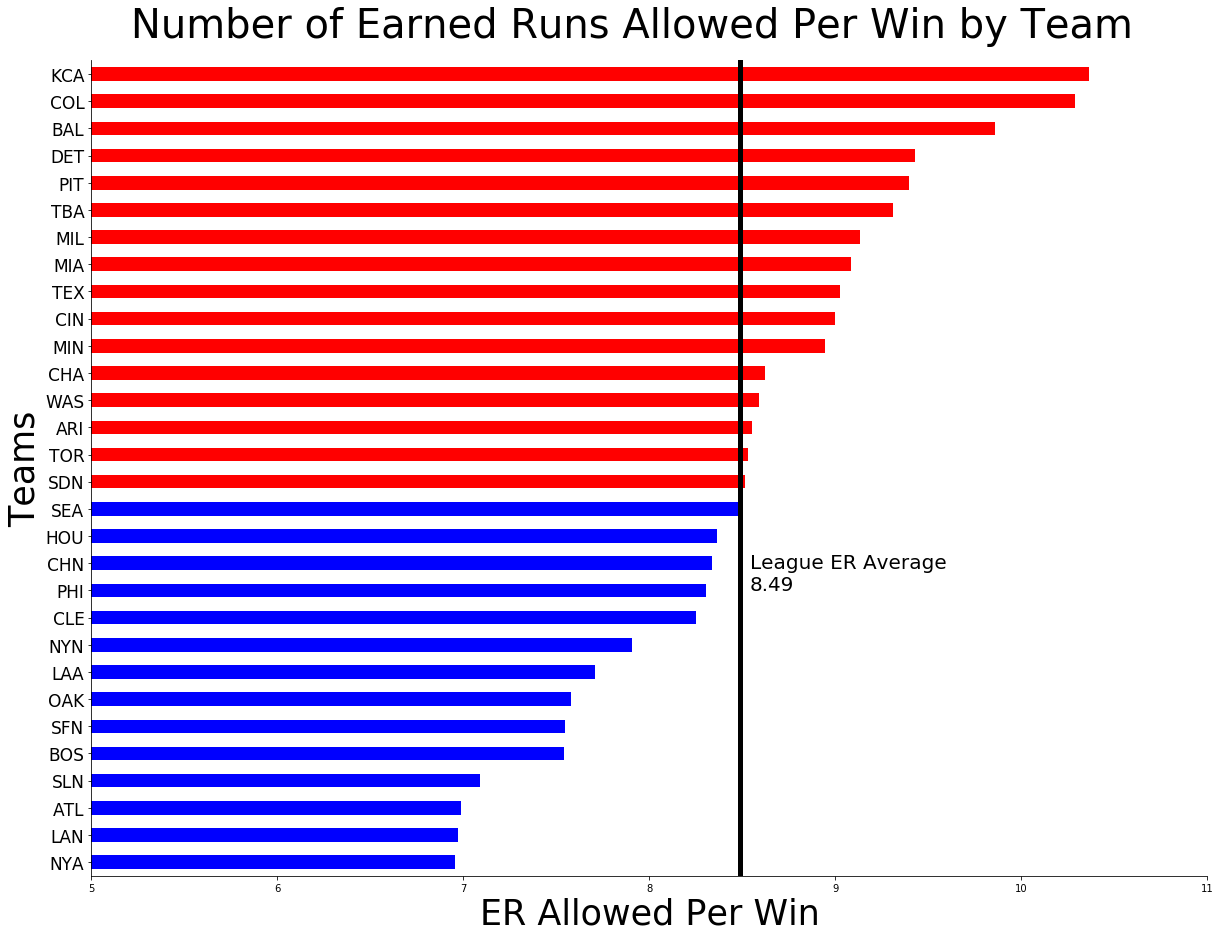

In [40]:
fig,ax=plt.subplots(figsize=(20,15))

colors_3=[]
for item in Pitching_ER["ER/Win"]:
    if item>Pitching_ER["ER/Win"].mean():
        colors_3.append("r")
    else:
        colors_3.append("b")

Pitching_ER=Pitching_ER.sort_values("ER/Win")
Pitching_ER.plot(ax=ax,y="ER/Win",kind="barh",color=colors_3)


ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_ylabel("Teams",fontsize=35)
ax.set_xlabel("ER Allowed Per Win", fontsize=35)


avg_er=Pitching_ER["ER/Win"].mean()
ax.axvline(x=avg_er,
          color="k", label="Average",linewidth=5)
message_er= "League ER Average \n" + str(round(avg_er,2))

ax.text(avg_er+.05,10,message_er,fontsize=20)


ax.legend().set_visible(False)

ax.set_xlim(5,11)

ax.set_ymargin(0)

plt.yticks(fontsize=17)

fig.suptitle("Number of Earned Runs Allowed Per Win by Team",fontsize=40,y=.93)

plt.show()

This graph gives each team's total Earned Runs allowed per win by their Pitchers.  It indicates the league average of 8.49 and prints teams that give up more Earned Runs than average in Red and teams that give up fewer Earned Runs than average in blue.  Much like RBI and HR production, Los Angeles gives up significantly below average Earned Runs per win and Colorado gives up significantly above average Earned Runs per win.  The New York Yankees give up the lowest Earned Run per win in the MLB and the Kansas City Royals give up the most Earned Runs per win.

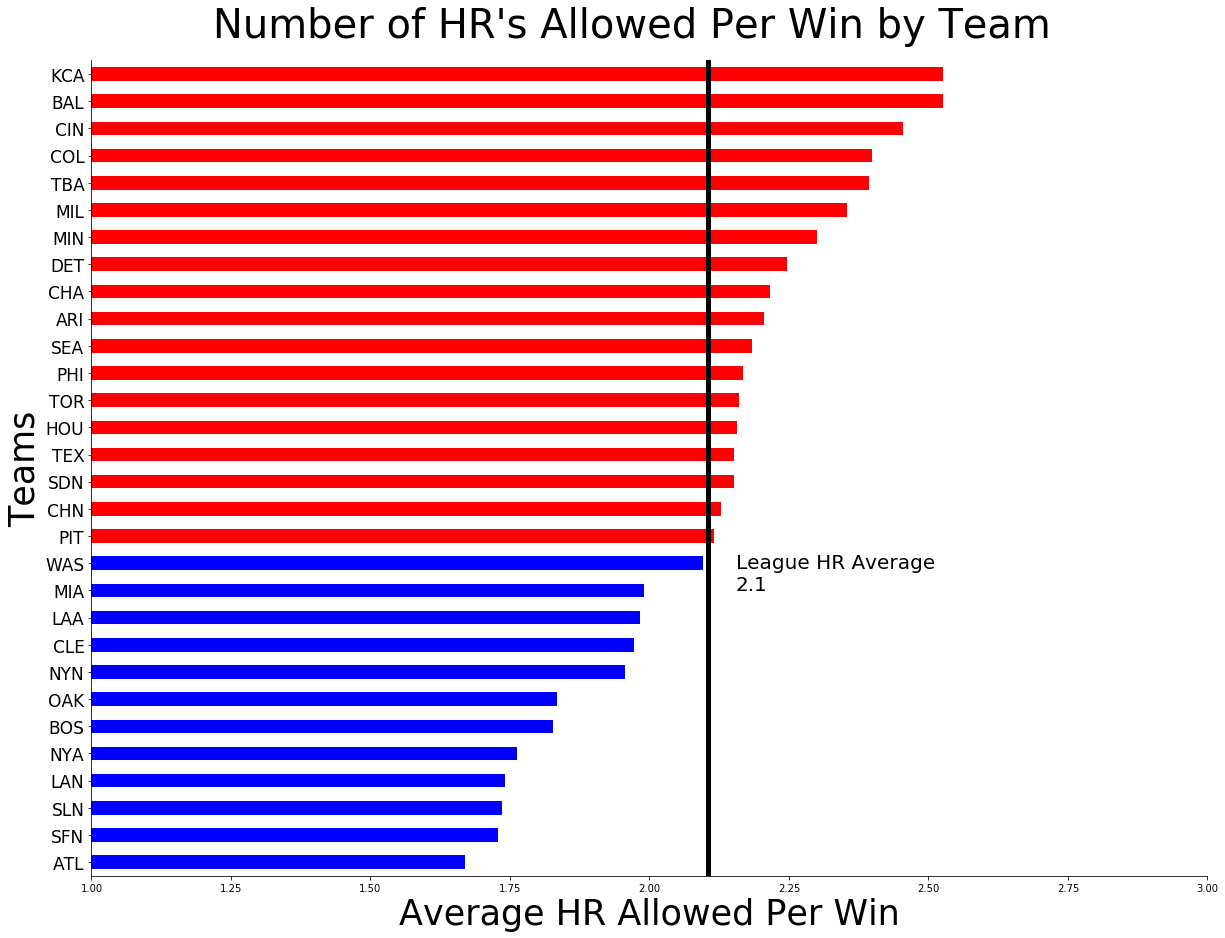

In [41]:
fig,ax=plt.subplots(figsize=(20,15))

colors_4=[]
for item in Pitching_HR["HR/Win"]:
    if item>Pitching_HR["HR/Win"].mean():
        colors_4.append("r")
    else:
        colors_4.append("b")

Pitching_HR=Pitching_HR.sort_values("HR/Win")
Pitching_HR.plot(ax=ax,y="HR/Win",kind="barh",color=colors_4)



ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_ylabel("Teams",fontsize=35)
ax.set_xlabel("Average HR Allowed Per Win", fontsize=35)


avg_hr=Pitching_HR["HR/Win"].mean()
ax.axvline(x=avg_hr,
          color="k", label="Average",linewidth=5)
message_hr= "League HR Average \n" + str(round(avg_hr,2))

ax.text(avg_hr+.05,10,message_hr,fontsize=20)


ax.legend().set_visible(False)

ax.set_xlim(1,3)

ax.set_ymargin(0)

plt.yticks(fontsize=17)

fig.suptitle("Number of HR's Allowed Per Win by Team",fontsize=40,y=.93)

plt.show()

This graph shows HR's allowed per win and shows the average of 2.1.  Like the previous graph, teams in red gave up more HR's per win than the league average and teams in blue gave up fewer HR's than the average.  Following the pattern, Los Angeles is among the bottom teams on the graph and Colorado is among the highest.  Atlanta gave up the fewest HR's per win, while Kansas City gave up the most HR's per win.  Kansas City gave up both the most Earned Runs and the most Home Runs per win in the League, suggesting that Pitchers who play their home games in Kansas City face increased offensive production.

## Park Dimension Data

In [18]:
park="/my_first_repository/master/ParkConfig.csv"  ##read in dataset about Parks
Park_Data=pd.read_csv(url+park)
Park_Data.set_index("Year",inplace=True)
Park_Data=Park_Data.loc[Years]
prk_names="/my_first_repository/master/Home%20Main%20Data%20With%20Parks%20Breakout.csv"
Park_Names=pd.read_csv(url+prk_names)
Park_Names.set_index("Year",inplace=True)
Park_Names=Park_Names.loc[Years]
Park_Names=Park_Names[["TeamID","Park_ID"]]
Park_Names.reset_index(inplace=True)
Park_Names.columns=["Year","TeamID","parkID"]
Park_Data=pd.merge(Park_Data,Park_Names,how="inner",
                   on="parkID",indicator=True)  ##merge first two parks data set

In [19]:
pks="/my_first_repository/master/Parks.csv"  ## 3rd data set on parks
prks=pd.read_csv(url+pks)
prks.drop(["START","END","NOTES","AKA","Exact"],axis=1,inplace=True)  ##cleaning up data
prks.drop(["CITY","STATE","NAME"],axis=1,inplace=True)
prks.columns=["parkID","League","Lat","Long","Alt"]
Parks_Data=pd.merge(Park_Data,prks,on="parkID",how="inner") ## merge this data set into existing merged dataframe

In [20]:
Parks_Data.drop(["Cover","SLF_Dim","LC_Dim","RC_Dim","LFA_Dim","LCC_Dim","RCC_Dim","RFA_Dim","SRF_Dim"]
                ,axis=1,inplace=True)  ##cleaning up data
Parks_Data["AVG_Dim"]=((Parks_Data["LF_Dim"]+Parks_Data["CF_Dim"]
                        +Parks_Data["RF_Dim"])/3)  ## create a column equal to the sum of dimensions to each part of 
                                                    ##field and divide by 3
Parks_Data.columns=['parkID', 'NAME', 'Capacity', 'Surface', 'Area_Fair', 'LF_Dim',
        'CF_Dim', 'RF_Dim', 'Backstop', 'Foul', 'LF_W',
       'LC_W', 'CF_W', 'RC_W', 'RF_W', 'Comments', 'Year', 'teamID', '_merge',
       'League', 'Lat', 'Long', 'Alt', 'AVG_Dim']
Parks_Data["teamID"].replace({"MON":"WAS","FLO":"MIA",
                                "ANA":"LAA"},
                               inplace=True)
Parks_Data.head()

,parkID,NAME,Capacity,Surface,Area_Fair,LF_Dim,CF_Dim,RF_Dim,Backstop,Foul,...,RF_W,Comments,Year,teamID,_merge,League,Lat,Long,Alt,AVG_Dim
0,ANA01,Edison International Field of Anaheim,45054.0,N,110.0,330.0,408.0,330.0,60.0,N,...,18.0,First year of major renovation.,1998,LAA,both,AL,33.80029,-117.882685,154,356.0
1,ANA01,Edison International Field of Anaheim,45054.0,N,110.0,330.0,408.0,330.0,60.0,N,...,18.0,First year of major renovation.,1999,LAA,both,AL,33.80029,-117.882685,154,356.0
2,ANA01,Edison International Field of Anaheim,45054.0,N,110.0,330.0,408.0,330.0,60.0,N,...,18.0,First year of major renovation.,2000,LAA,both,AL,33.80029,-117.882685,154,356.0
3,ANA01,Edison International Field of Anaheim,45054.0,N,110.0,330.0,408.0,330.0,60.0,N,...,18.0,First year of major renovation.,2001,LAA,both,AL,33.80029,-117.882685,154,356.0
4,ANA01,Edison International Field of Anaheim,45054.0,N,110.0,330.0,408.0,330.0,60.0,N,...,18.0,First year of major renovation.,2002,LAA,both,AL,33.80029,-117.882685,154,356.0


In [21]:
Team_Parks=Parks_Data.groupby("teamID")
Avg_Dimensions=pd.DataFrame(Team_Parks.AVG_Dim.mean())  ## creates a dataframe that gives the average value for average
                                                        ## dimension for each team.  I chose to use mean because some 
                                                        ## teams have changed their stadium design since 1998
Avg_Dimensions["AVG_Dim"]=round(Avg_Dimensions["AVG_Dim"],2)  ## rounds avg dimension to 2 decimal points

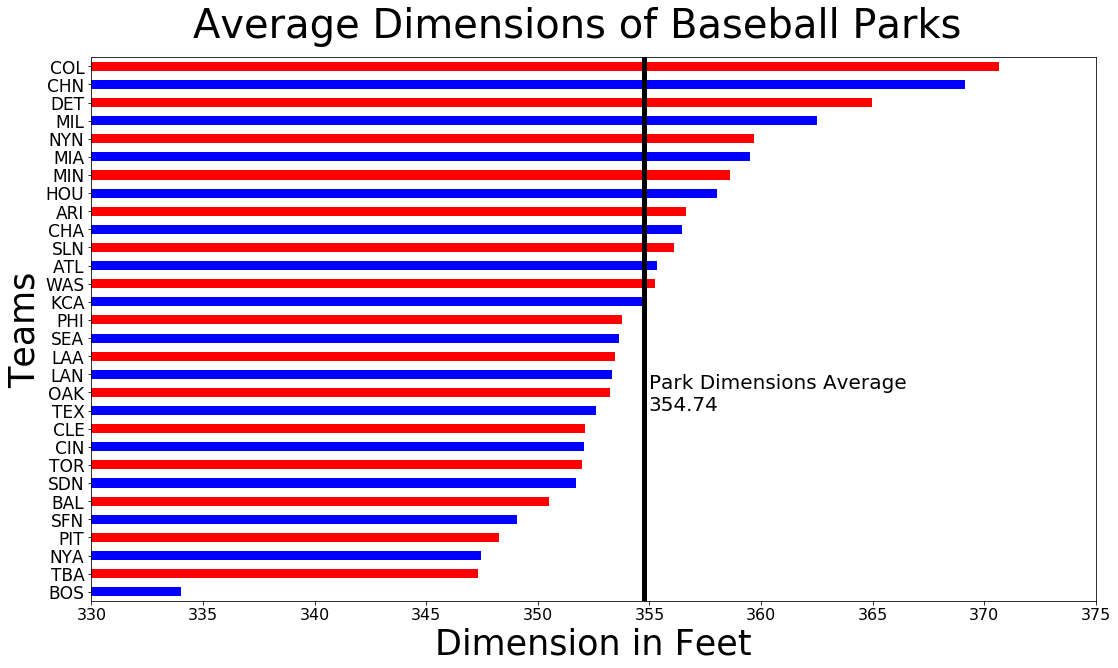

In [22]:
fig,ax=plt.subplots(figsize=(18,10))

Avg_Dimensions=Avg_Dimensions.sort_values("AVG_Dim")
Avg_Dimensions.plot(ax=ax,kind="barh",color=[["b","r"]])


avg_dim=Avg_Dimensions["AVG_Dim"].mean()
ax.axvline(x=avg_dim,
          color="k", label="Average",linewidth=5)
message_hr= "Park Dimensions Average \n" + str(round(avg_dim,2))

ax.text(avg_dim+.23,10,message_hr,fontsize=20)

ax.set_xlim(330,375)

plt.yticks(fontsize=17)
plt.xticks(fontsize=16)
fig.suptitle("Average Dimensions of Baseball Parks",fontsize=40,y=.95)
ax.set_ylabel("Teams",fontsize=35)
ax.set_xlabel("Dimension in Feet", fontsize=35)

ax.legend().set_visible(False)

plt.show()

This graphs gives the Average Dimension of each team's stadium throughout the MLB.  Average Dimension is defined as the sum of the distances to Left, Center, and Right Fields divided by 3.  The graph also indicates that the average average dimension of an MLB stadium is 354.74 feet.  Notably, Colorado has the biggest stadium and also had among the highest run scoring stats for its players. Colorado could be such a friendly environment to hitters both because of its high altitude and the fact that its field is very large, meaning that fielders have much more ground to cover.  It might be that for a larger field, the probability that any given batted ball becomes a hit is higher.  This is further supported by the fact that Boston's and San Francisco's (SFN) pitchers gave up below avereage Earend Runs and Home Runs per win and both teams have average stadium dimensions well below the League Average.

## Plotting Run Production Stats versus Dimensions

In [23]:
Team_RBI=Team_RBI.join(Avg_Dimensions) ## this adds avg dimensions dataframe to stat summaries dataframes
Team_HR=Team_HR.join(Avg_Dimensions)
Pitching_ER=Pitching_ER.join(Avg_Dimensions)
Pitching_HR=Pitching_HR.join(Avg_Dimensions)

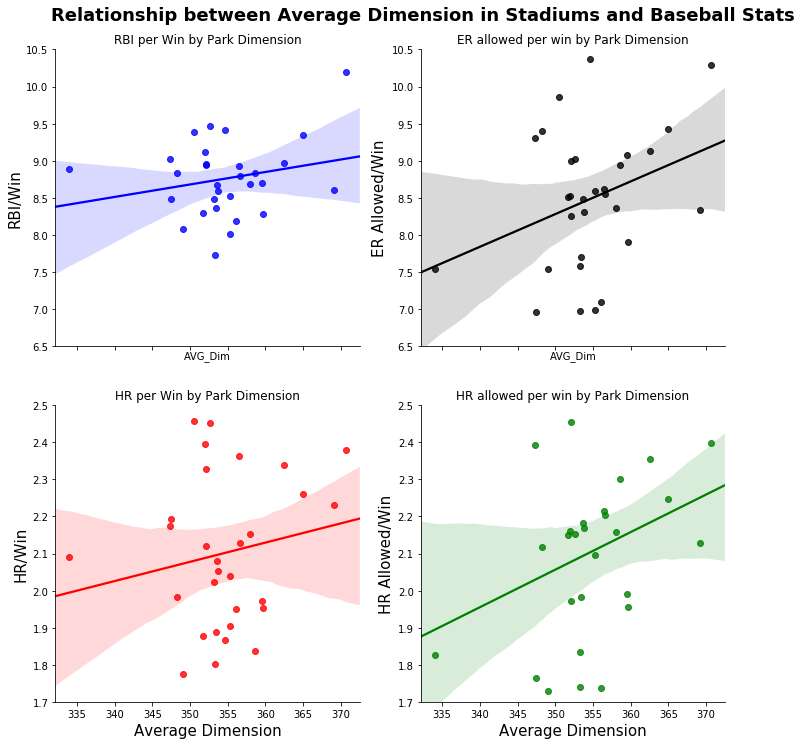

In [24]:
fig,[[ax1,ax2],[ax3,ax4]]=plt.subplots(ncols=2, nrows=2,figsize=(12,12),sharex=True) ## create a figure with 4 axes
                                                ##delineating the axes as ax1,..etc made it simpler to adjust them 
                                                ## individually


sns.regplot(Team_RBI["AVG_Dim"],Team_RBI["RBI/Wins"],ax=ax1,color="b")  ##I used Seaborn to plot scatter plot and line
                                                                        ## of best fit for each set of variables.  The
                                                                        ## variable listed shows up as x, the 2nd shows
                                                                        ## up as the y, the 3rd part indicates which 
                                                                        ## axis and the last dictates color. Regplot 
                                                                        ## also shades in a Confidence Interval for the
                                                                        ## line of best fit
sns.regplot(Team_HR["AVG_Dim"],Team_HR["HR/Wins"],ax=ax3, color="r")
sns.regplot(Pitching_ER["AVG_Dim"],Pitching_ER["ER/Win"],ax=ax2, color="k")
sns.regplot(Pitching_HR["AVG_Dim"],Pitching_HR["HR/Win"],ax=ax4, color="g")


ax1.set_ylabel("RBI/Win",fontsize=15)
ax2.set_ylabel("ER Allowed/Win",fontsize=15)
ax3.set_ylabel("HR/Win",fontsize=15)
ax4.set_ylabel("HR Allowed/Win",fontsize=15)

ax3.set_xlabel("Average Dimension",fontsize=15)
ax4.set_xlabel("Average Dimension",fontsize=15)

ax1.set_title("RBI per Win by Park Dimension",x=.5)
ax2.set_title("ER allowed per win by Park Dimension",x=.5)
ax3.set_title("HR per Win by Park Dimension",x=.5)
ax4.set_title("HR allowed per win by Park Dimension",x=.5)

ax1.spines["right"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax3.spines["right"].set_visible(False)
ax4.spines["right"].set_visible(False)

ax1.spines["top"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax3.spines["top"].set_visible(False)
ax4.spines["top"].set_visible(False)

ax4.set_ylim(1.7,2.5)
ax3.set_ylim(1.7,2.5)
ax1.set_ylim(6.5,10.5)
ax2.set_ylim(6.5,10.5)

fig.suptitle("Relationship between Average Dimension in Stadiums and Baseball Stats",x=.55,y=.93,
             fontsize=18,fontweight="bold")
plt.show()



These 4 graphs plot the Average Dimensions of baseball stadiums versus the 4 stats (RBI/Win, ER Allowed/Win, HR/Win, and HR Allowed/Win) depicted in the bar graphs above.  Average Dimension is on the x-axis while each stat consists of a y-axis on one of the plots.  For RBI's, and ER Allowed per win, there seems to be some loose relationship between bigger stadiums and higher run production.  As the average dimension of a stadium gets bigger, the total RBI/Win, and ER Allowed/Win seems to trend upward.  The relationship is less clear for the Home Run stats, which seem more randomly scattered among stadiums of different sizes.

## Plotting Run Production Stats against Stadium Altitudes

In [25]:
Altitude=pd.DataFrame(Team_Parks.Alt.mean())  ## Adding altitude data to dataframe
Pitching_ER=Pitching_ER.join(Altitude)
Team_HR=Team_HR.join(Altitude)
Pitching_HR=Pitching_HR.join(Altitude)
Team_RBI=Team_RBI.join(Altitude)

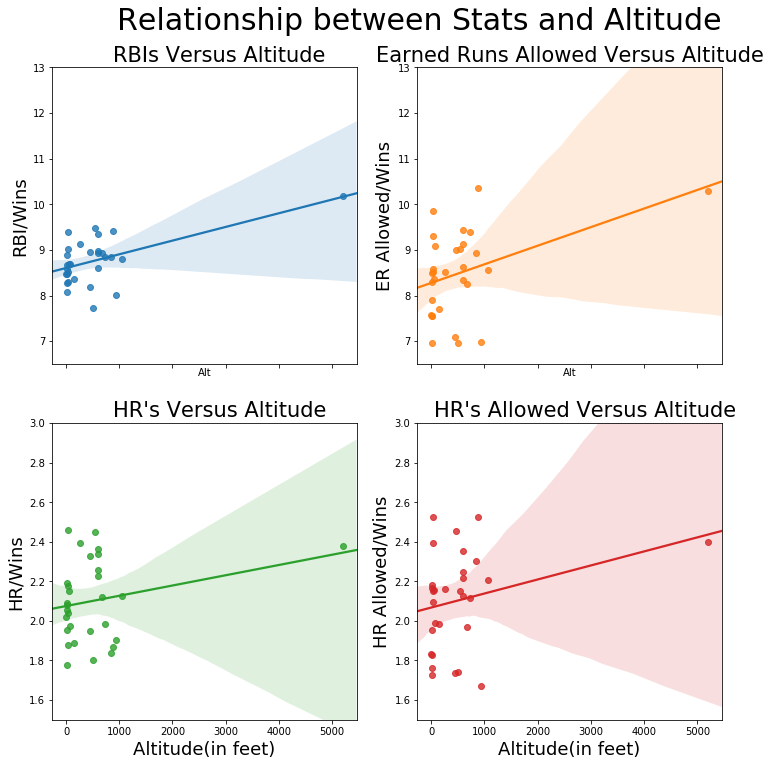

In [26]:
fig,[[ax1,ax2],[ax3,ax4]]=plt.subplots(ncols=2, nrows=2,figsize=(12,12),sharex=True)

sns.regplot(Team_RBI["Alt"],Team_RBI["RBI/Wins"],ax=ax1)
sns.regplot(Pitching_ER["Alt"],Pitching_ER["ER/Win"],ax=ax2)
sns.regplot(Team_HR["Alt"],Team_HR["HR/Wins"],ax=ax3)
sns.regplot(Pitching_HR["Alt"],Pitching_HR["HR/Win"],ax=ax4)


ax1.set_ylabel("RBI/Wins",fontsize=18)
ax2.set_ylabel("ER Allowed/Wins",fontsize=18)
ax3.set_ylabel("HR/Wins",fontsize=18)
ax4.set_ylabel("HR Allowed/Wins",fontsize=18)

ax3.set_xlabel("Altitude(in feet)",fontsize=18)
ax4.set_xlabel("Altitude(in feet)",fontsize=18)

ax1.set_title("RBIs Versus Altitude",fontsize=21,x=.55)
ax2.set_title("Earned Runs Allowed Versus Altitude",fontsize=21,x=.5)
ax3.set_title("HR's Versus Altitude",fontsize=21,x=.55)
ax4.set_title("HR's Allowed Versus Altitude",fontsize=21,x=.55)

ax4.set_ylim(1.5,3.0)
ax3.set_ylim(1.5,3.0)
ax2.set_ylim(6.5,13)
ax1.set_ylim(6.5,13)
fig.suptitle("Relationship between Stats and Altitude",fontsize=30,y=.95,x=.55)



plt.show()

These 4 graphs show the relationship between the Runs and Home Runs statistiscs and the altitudes of each stadium.  Altitude is on the x-axis while each y-axis is one of the stats plotted earlier.  The outlier point on the far right belongs to Colorado, who play at a substantially higher altitude than any other team in the League.  I think these graphs are interesting, in that they show how abnormal Colorado's situation is compared to the rest of the League.  Colorado plays at an altitude of greater than 5000 feet while almost the entire rest of the League plays at below 1000 feet.  Furthermore, these graphs suggest a relationship between Colorado's altitude and their stats, since each graph suggests they are among the highest scoring teams in the league.  Since Colorado is such an outlier, however, these graphs don't really communicate anything about the rest of the league clustered under 1200 feet high altitudes, so I decided to re-run these graphs excluding Colorado.

In [27]:
Team_List=list(Batting_Data.teamID.unique())  ## creates a list of all teams
No_Col=list(Team_List)
No_Col.remove("COL")  ##creates new list called No_Col that removed COL
Team_HR_exc=Team_HR.loc[No_Col]  ##creates new dataframes using groupby dataframes without COL
Team_RBI_exc=Team_RBI.loc[No_Col]
Pitching_ER_exc=Pitching_ER.loc[No_Col]
Pitching_HR_exc=Pitching_HR.loc[No_Col]

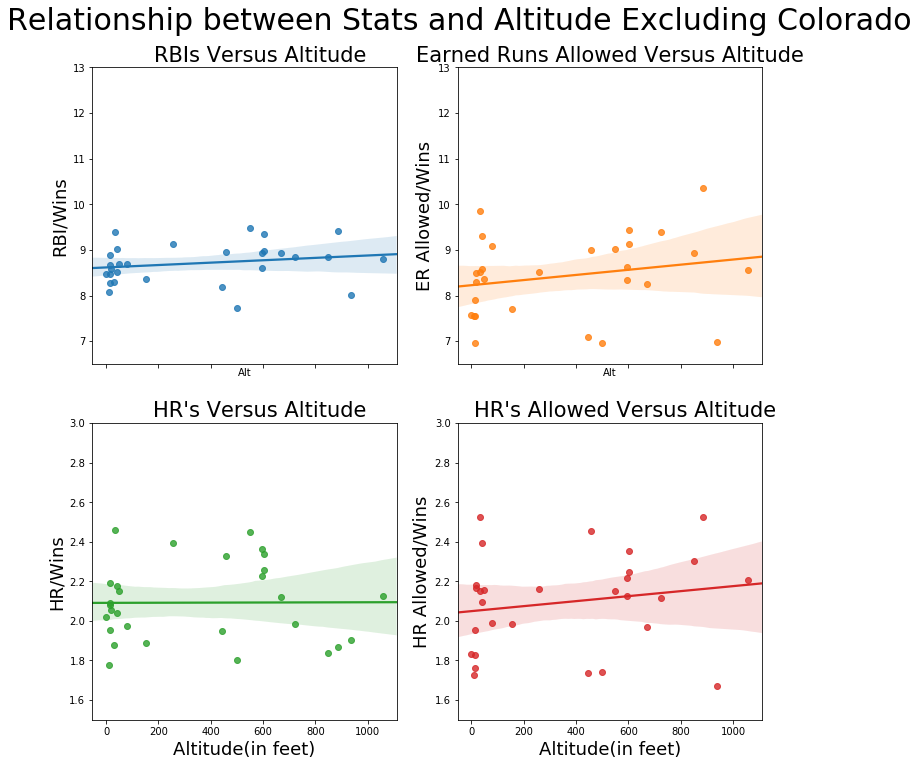

In [28]:
fig,[[ax1,ax2],[ax3,ax4]]=plt.subplots(ncols=2, nrows=2,figsize=(12,12),sharex=True)

sns.regplot(Team_RBI_exc["Alt"],Team_RBI_exc["RBI/Wins"],ax=ax1)
sns.regplot(Pitching_ER_exc["Alt"],Pitching_ER_exc["ER/Win"],ax=ax2)
sns.regplot(Team_HR_exc["Alt"],Team_HR_exc["HR/Wins"],ax=ax3)
sns.regplot(Pitching_HR_exc["Alt"],Pitching_HR_exc["HR/Win"],ax=ax4)


ax1.set_ylabel("RBI/Wins",fontsize=18)
ax2.set_ylabel("ER Allowed/Wins",fontsize=18)
ax3.set_ylabel("HR/Wins",fontsize=18)
ax4.set_ylabel("HR Allowed/Wins",fontsize=18)

ax3.set_xlabel("Altitude(in feet)",fontsize=18)
ax4.set_xlabel("Altitude(in feet)",fontsize=18)

ax1.set_title("RBIs Versus Altitude",fontsize=21,x=.55)
ax2.set_title("Earned Runs Allowed Versus Altitude",fontsize=21,x=.5)
ax3.set_title("HR's Versus Altitude",fontsize=21,x=.55)
ax4.set_title("HR's Allowed Versus Altitude",fontsize=21,x=.55)

ax4.set_ylim(1.5,3.0)
ax3.set_ylim(1.5,3.0)
ax2.set_ylim(6.5,13)
ax1.set_ylim(6.5,13)
fig.suptitle("Relationship between Stats and Altitude Excluding Colorado",fontsize=30,y=.95,x=.55)



plt.show()

These are the same 4 graphs printed above just wihout Colorado.  Although there seems to be a correlation between Colorado's altitude and their offensive production, that relationship does not hold true for the rest of the League's 29 teams.  These graphs suggest that teams that play at marginally higher altitdues are not significantly more likely to score runs than teams playing at slightly lower altitudes.  I think that this suggests that high altitudes can influence baseball scoring, but only when those altitudes become substantially higher than 1200 feet above sea level.

## Handedness and Dimensions 

The next thing I wanted to examine was to see if stadiums with short left field fences produce more RBI's and HR's for right handed hitters and whether short right field fences do the same for left handed hitters.  Right-handed hitters are generally more likely to hit ball  to left field, while left-handed hitters hit the ball to right field more often than any other part of the field.  I suspected that stadiums with short distances to either corner field would produce better hitting stats for batters better positioned to take advantage. I examined this by adding a 2nd group (bats) to the group by and creating 4 dataframes one each for RBI's and HR's for Right-Handed Batters and Left-Handed Batters.

In [29]:
Handedness=Batting_Data.groupby(["teamID","bats"])  ## groups by team and which side player bats from
RHB=pd.DataFrame()  ##for loop adds all batters that bat right handed to RHB dataframe
for team in Team_List:
    t=Handedness.get_group((team,"R"))
    RHB=pd.concat([RHB,t])
RHB=RHB.groupby("teamID")
RHB_HR=RHB.HR.describe()  ##creates summary dataframe for each stat
RHB_RBI=RHB.RBI.describe()
RHB_HR["Sum"]=RHB.HR.sum()
RHB_RBI["Sum"]=RHB.RBI.sum()
RHB_HR.columns

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'Sum'], dtype='object')

In [30]:
Left_Field=pd.DataFrame(round(Team_Parks.LF_Dim.mean(),2))  ##creates DataFrame for left field dimensions
RHB_HR=RHB_HR.join(Total_Wins)
RHB_HR["HR/Wins"]=RHB_HR["Sum"]/RHB_HR["W"]
RHB_HR=RHB_HR.join(Left_Field)
RHB_RBI=RHB_RBI.join(Total_Wins)
RHB_RBI["RBI/Wins"]=RHB_RBI["Sum"]/RHB_RBI["W"]
RHB_RBI=RHB_RBI.join(Left_Field)


In [31]:
LHB=pd.DataFrame()
for team in Team_List:  ##for loop adds all left handed batters to LHB dataframe
    l=Handedness.get_group((team,"L"))
    LHB=pd.concat([LHB,l])
LHB=LHB.groupby("teamID")
LHB_HR=LHB.HR.describe()  ##creates summary dataframe for each stat
LHB_RBI=LHB.RBI.describe()
LHB_HR["Sum"]=LHB.HR.sum()
LHB_RBI["Sum"]=LHB.RBI.sum()

In [32]:
Right_Field=pd.DataFrame(round(Team_Parks.RF_Dim.mean(),2))  ##creates dataframe for Right Field Dimension
LHB_HR=LHB_HR.join(Total_Wins)
LHB_HR["HR/Wins"]=LHB_HR["Sum"]/LHB_HR["W"]
LHB_HR=LHB_HR.join(Right_Field)
LHB_RBI=LHB_RBI.join(Total_Wins)
LHB_RBI["RBI/Wins"]=LHB_RBI["Sum"]/LHB_RBI["W"]
LHB_RBI=LHB_RBI.join(Right_Field)

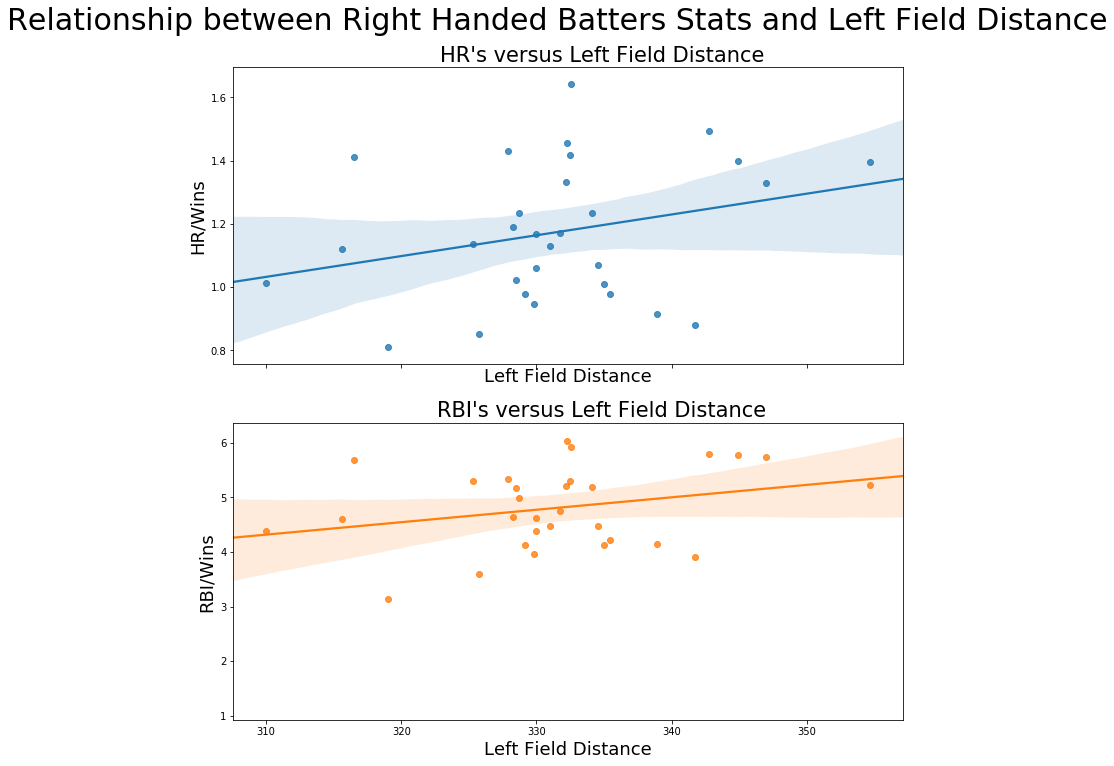

In [33]:
fig,ax=plt.subplots(ncols=1,nrows=2,figsize=(12,12),sharex=True)

sns.regplot(RHB_HR["LF_Dim"],RHB_HR["HR/Wins"],ax=ax[0])
sns.regplot(RHB_RBI["LF_Dim"],RHB_RBI["RBI/Wins"],ax=ax[1])

ax[0].set_ylabel("HR/Wins",fontsize=18)
ax[1].set_ylabel("RBI/Wins",fontsize=18)
ax[0].set_xlabel("Left Field Distance",fontsize=18)
ax[1].set_xlabel("Left Field Distance",fontsize=18)

fig.suptitle("Relationship between Right Handed Batters Stats and Left Field Distance",fontsize=30,y=.95)

ax[0].set_title("HR's versus Left Field Distance",fontsize=21,x=.55)
ax[1].set_title("RBI's versus Left Field Distance",fontsize=21,x=.55)



plt.show()

These graphs plot the relationship between HR/Win and RBI/Win for just Right Handed Batters against Left Field Distance.  Interestingly, right handed batters seem to perform better in stadiums with longer left-field fences.  This seems counter-intuitive to me and I don't know why that relationship might exist, or whether there is any meaning to it.  The RBI/Win might be explained by the theory that longer fences means more ground for defenders to cover which leads to more hits.

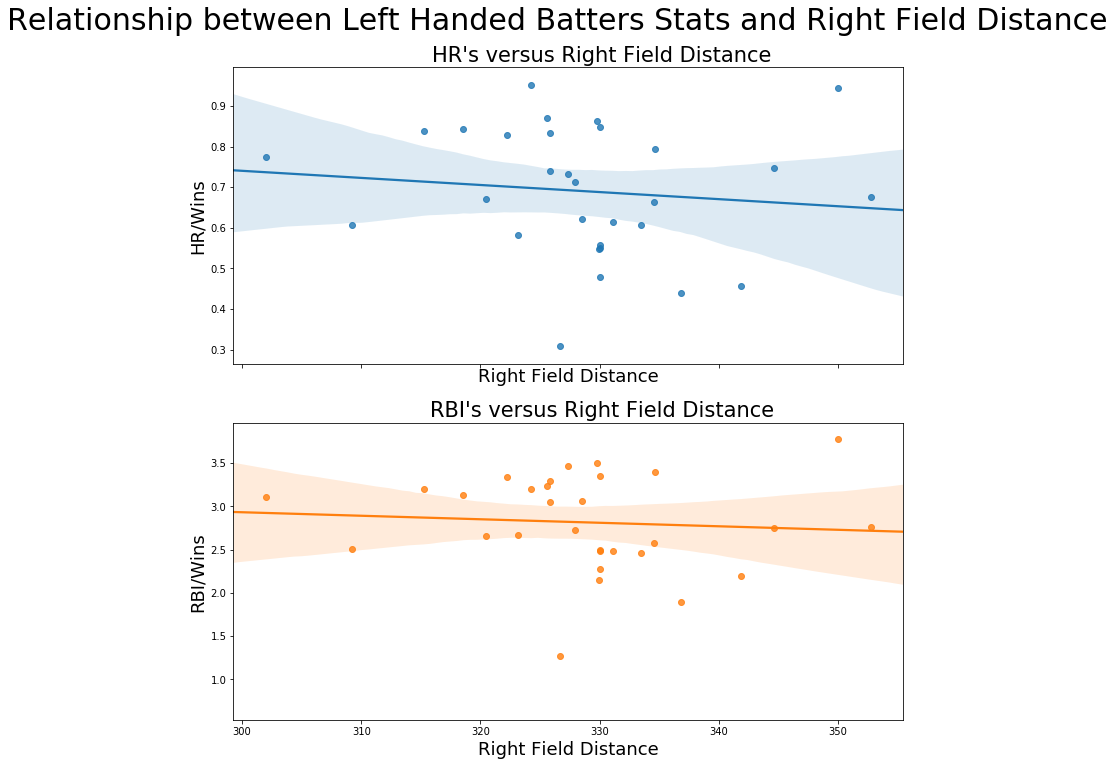

In [34]:
fig,ax=plt.subplots(ncols=1,nrows=2,figsize=(12,12),sharex=True)

sns.regplot(LHB_HR["RF_Dim"],LHB_HR["HR/Wins"],ax=ax[0])
sns.regplot(LHB_RBI["RF_Dim"],LHB_RBI["RBI/Wins"],ax=ax[1])

ax[0].set_ylabel("HR/Wins",fontsize=18)
ax[1].set_ylabel("RBI/Wins",fontsize=18)
ax[0].set_xlabel("Right Field Distance",fontsize=18)
ax[1].set_xlabel("Right Field Distance",fontsize=18)

fig.suptitle("Relationship between Left Handed Batters Stats and Right Field Distance",fontsize=30,y=.95)

ax[0].set_title("HR's versus Right Field Distance",fontsize=21,x=.55)
ax[1].set_title("RBI's versus Right Field Distance",fontsize=21,x=.55)


plt.show()

This graphs plots the relationship between HR/Win and RBI/Win for Left-Handed Batters agsinst Right Field Distance.  Contrary to the Right Handed Batters, these graphs trend downward, suggesting that Left Handed Batters perform better in stadiums with shorter right fields.  However, this relationship does not seem to be very strong

## How Changing a Stadium Influences Run Production Stats

Finally, I decided to take an example of 2 teams, the New York Mets and the New York Yankes, who both opened new stadiums in the same year, and determine how the opening of a stadium influenced their offensive production. Citi Field (Mets) and the New Yankee Stadium both opened in 2009, which makes it easy to compare the differing impact of the 2 stadiums.

In [35]:
new_stad=["NYN","NYA"] ## list of teams I want to compare
New_Parks=Batting_Data.set_index("teamID").loc[new_stad]  ## pulled out new team list
Batting_Parks=New_Parks.groupby(["teamID","yearID"])  ## grouped them by both team and year
Batting_HR=Batting_Parks.HR.describe()  ##creates dataframe with summary stats of HR and RBI
Batting_RBI=Batting_Parks.RBI.describe()
Batting_HR=Batting_HR.unstack(0) ##unstacking the index allows me to plot 2 lines, one for each team
Batting_RBI=Batting_RBI.unstack(0)

In [36]:
Batting_HR.head()

count            mean                  std            min       25%  \
teamID   NYA   NYN       NYA       NYN        NYA       NYN  NYA  NYN  NYA   
yearID                                                                       
1998    38.0  50.0  5.447368  2.720000   9.048510  5.879886  0.0  0.0  0.0   
1999    39.0  45.0  4.948718  4.022222   8.425990  8.907323  0.0  0.0  0.0   
2000    46.0  47.0  4.456522  4.212766   7.799449  8.492800  0.0  0.0  0.0   
2001    47.0  44.0  4.319149  3.340909   8.536638  6.914572  0.0  0.0  0.0   
2002    38.0  48.0  5.868421  3.333333  10.825823  6.959865  0.0  0.0  0.0   

             50%        75%        max        
teamID  NYN  NYA  NYN   NYA  NYN   NYA   NYN  
yearID                                        
1998    0.0  0.0  0.0  8.75  2.0  28.0  23.0  
1999    0.0  0.0  0.0  6.50  3.0  28.0  40.0  
2000    0.0  0.0  0.0  5.75  3.0  30.0  38.0  
2001    0.0  0.0  0.0  1.50  3.5  34.0  36.0  
2002    0.0  0.0  0.0  6.00  3.0  41.0  33.0

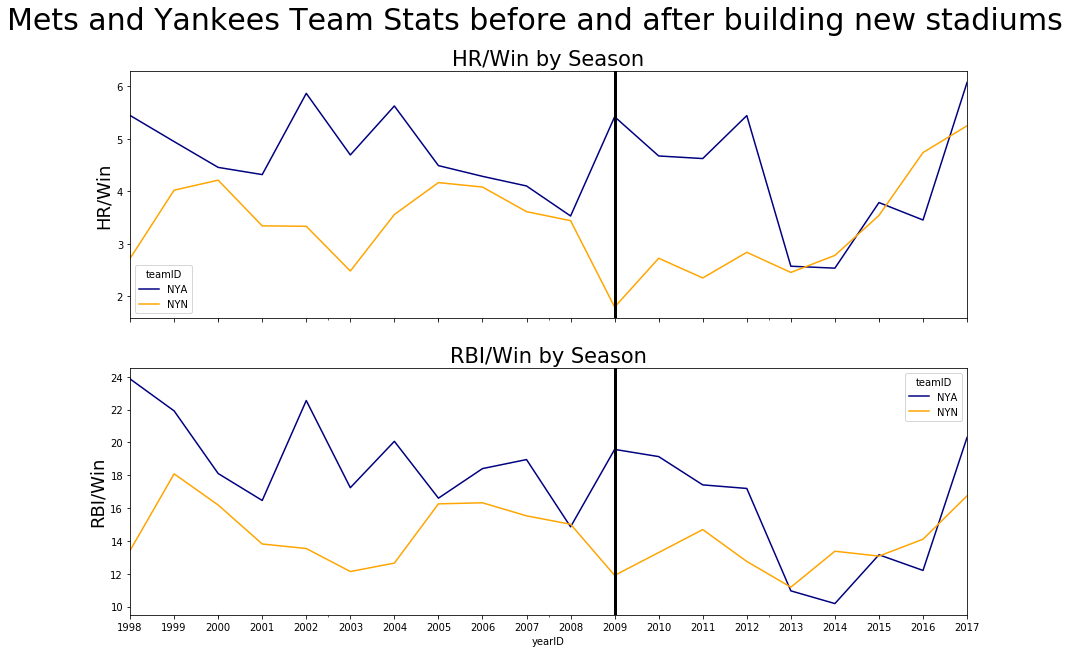

In [37]:
fig,[ax1,ax2]=plt.subplots(ncols=1,nrows=2,figsize=(15,10),sharex=True)

colors_6=["navy","orange"]

Batting_HR.plot(y="mean",kind="line",ax=ax1,color=colors_6)
Batting_RBI.plot(y="mean",kind="line",ax=ax2,color=colors_6)

new=ax1.axvline(x=2009.0,
          color="k", label="New Stadiums",linewidth=3)
new2=ax2.axvline(x=2009.0,color="k",label="New Stadium",linewidth=3)

ax1.set_xlim(1998,2017)
ax2.set_xticks(list(range(1998,2018)))

ax1.set_ylabel("HR/Win",fontsize=18)
ax2.set_ylabel("RBI/Win",fontsize=18)
ax1.set_xlabel("Seasons",fontsize=18)
ax1.set_title("HR/Win by Season",fontsize=21)
ax2.set_title("RBI/Win by Season",fontsize=21)

fig.suptitle("Mets and Yankees Team Stats before and after building new stadiums",fontsize=30,y=.97)


plt.show()

These graphs plot the HR/Win by Season and RBI/Win by season for both the Mets and the Yankees from 1998 to 2017.  The black vertical line on both graphs indicates the opening of new stadiums in 2009. The Mets are plotted in orange while the Yankees are plotted in blue.  After opening their new stadium, the Mets have generally seen their offensive production trend upward.  Although their was a brief slip in both HR/Win and RBI/Win for the Mets in 2013, they have generally seen an increase each year in both stats since 2009.  This suggests that Citi Field might be a more offense friendly field than Shea Stadium, their previous field.  The Yankees, on the other hand, saw a steep drop in both offensive stats from 2009 to 2013 followed by a steep increase from 2013 to 2017.  It's not clear if anything changed in 2013 to trigger this change, but it could be that after a few seasons in their new stadium, the Yankees began to pursue players more likely to be successful given the new stadium's configuration. 